In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('LTP.csv', encoding='ISO-8859-1')
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [28]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['Unik'] = data.nunique()
data_info['null'] = data.isnull().sum()
data_info

,Tipe,Unik,null
laptop_ID,int64,1303,0
Company,object,19,0
Product,object,618,0
TypeName,object,6,0
Inches,float64,18,0
ScreenResolution,object,40,0
Cpu,object,118,0
Ram,object,9,0
Memory,object,39,0
Gpu,object,110,0


In [29]:
data.shape

(1303, 13)

In [30]:
data = data.drop(['laptop_ID', 'Product', 'Inches'], axis=1)

In [31]:
data["Ram"]=data["Ram"].str.replace('GB', '')
data["Ram"]=data["Ram"].astype(int)

In [32]:
data["Weight"]=data["Weight"].str.replace('kg', '')
data["Weight"]=data["Weight"].astype(float)

In [33]:
def extract_storage_types(memory_str):
    memory_str = memory_str.replace('TB', '000').replace('GB', '')

    ssd_gb = 0
    hdd_gb = 0
    hybrid_flash_gb = 0
    
    parts = memory_str.split('+')
    
    for part in parts:
        part = part.strip()  # Menghapus spasi berlebih
        
        size = float(part.split()[0])  
        if 'SSD' in part:
            ssd_gb += int(size)
        elif 'HDD' in part:
            hdd_gb += int(size)
        elif 'Flash' in part or 'Hybrid' in part:
            hybrid_flash_gb += int(size)
    
    return ssd_gb, hdd_gb, hybrid_flash_gb

storage_split = [extract_storage_types(mem) for mem in data['Memory']]
memory_df = pd.DataFrame(storage_split, columns=['SSD', 'HDD', 'Flash'])

data = pd.concat([data, memory_df], axis=1)


In [34]:
data['IPS'] = data['ScreenResolution'].str.contains('IPS').astype(int)
data['TouchScreen'] = data['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [35]:
data = data.drop(['Memory', 'ScreenResolution', 'Flash'], axis=1)

In [36]:
def kategori_os(ops):
    if 'mac' in ops.lower():
        return 'mac'
    elif 'windows' in ops.lower():
        return 'windows'
    else:
        return 'others'

In [37]:
data['OpSys'] = data['OpSys'].apply(kategori_os)

In [38]:
data['Gpu'] = data['Gpu'].str.split().str[0]

In [39]:
def kategori_cpu(cpu_str):
    cpu = cpu_str.lower()
    
    if 'intel core i5' in cpu:
        return 'Intel Core i5'
    elif 'intel core i7' in cpu:
        return 'Intel Core i7'
    elif 'intel core i3' in cpu:
        return 'Intel Core i3'
    elif 'amd' in cpu:
        return 'AMD'
    else:
        return 'Other'

In [40]:
data['Cpu'] = data['Cpu'].apply(kategori_cpu)

In [41]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']
['Ram', 'Weight', 'Price_euros', 'SSD', 'HDD', 'IPS', 'TouchScreen']


In [42]:
num_out = ['Ram', 'Weight', 'Price_euros', 'SSD', 'HDD', 'IPS', 'TouchScreen']

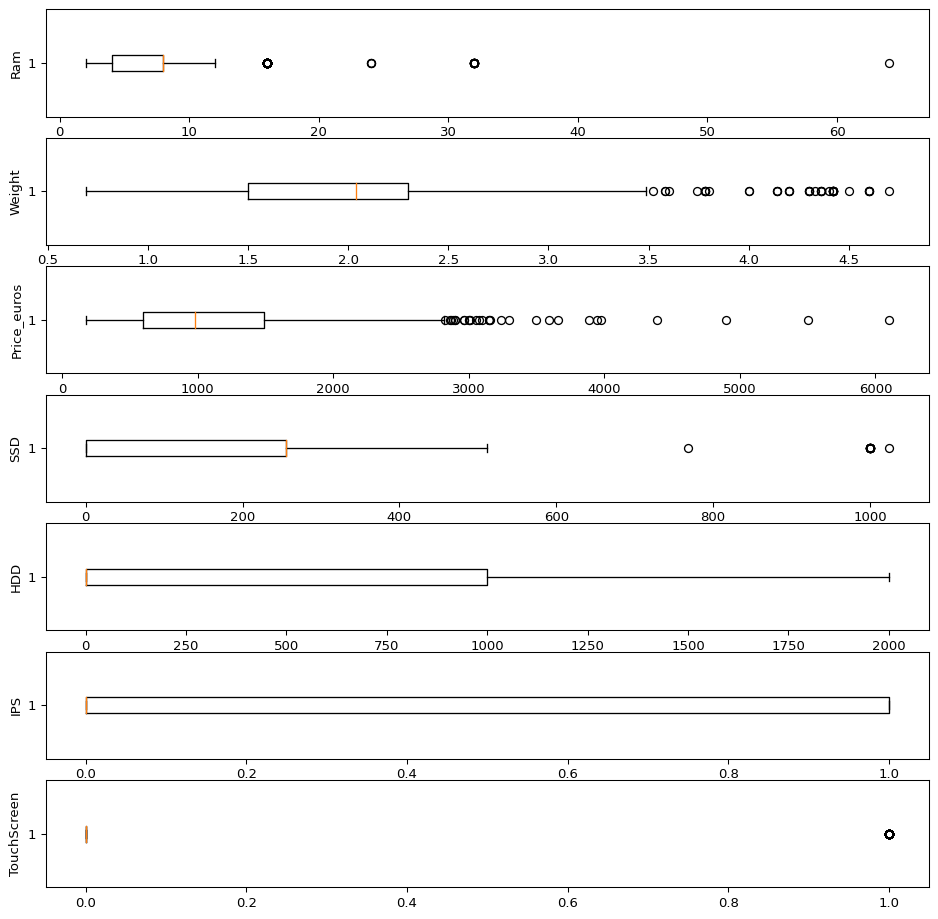

In [43]:
fig, axs = plt.subplots(len(num_out), 1, dpi=95, figsize=(12, 12))
i = 0
for col in num_out:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [44]:
for column in Numerical_col:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    data = data[~outliers]

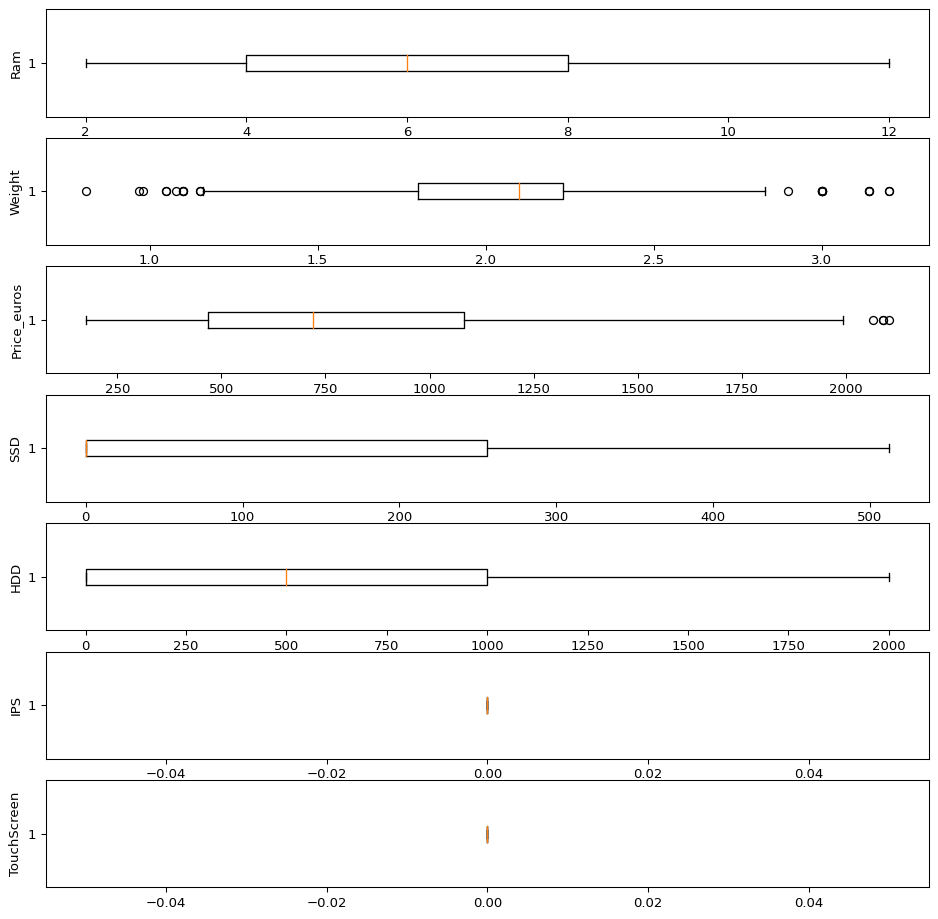

In [45]:
fig, axs = plt.subplots(len(num_out), 1, dpi=95, figsize=(12, 12))
i = 0
for col in num_out:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [46]:
data

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,IPS,TouchScreen
1,Apple,Ultrabook,Intel Core i5,8,Intel,mac,1.34,898.94,0,0,0,0
2,HP,Notebook,Intel Core i5,8,Intel,others,1.86,575.00,256,0,0,0
5,Acer,Notebook,AMD,4,AMD,windows,2.10,400.00,0,500,0,0
7,Apple,Ultrabook,Intel Core i5,8,Intel,mac,1.34,1158.70,0,0,0,0
10,HP,Notebook,Intel Core i5,4,Intel,others,1.86,393.90,0,500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,HP,Netbook,Other,2,Intel,windows,1.17,209.00,0,0,0,0
1297,Asus,Notebook,Intel Core i7,4,Nvidia,windows,2.20,720.32,0,500,0,0
1300,Lenovo,Notebook,Other,2,Intel,windows,1.50,229.00,0,0,0,0
1301,HP,Notebook,Intel Core i7,6,AMD,windows,2.19,764.00,0,1000,0,0


In [47]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

columns_to_encode = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']
for col in columns_to_encode:
    data[col] = encode.fit_transform(data[col])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_normalize = ['Ram', 'Weight', 'Price_euros', 'SSD', 'HDD', 'IPS', 'TouchScreen']
for col in columns_normalize:
    data[col] = scaler.fit_transform(data[[col]])

In [49]:
data = data.drop_duplicates()

In [50]:
data.duplicated().sum()

0

In [51]:
data.isnull().sum()

Company        0
TypeName       0
Cpu            0
Ram            0
Gpu            0
OpSys          0
Weight         0
Price_euros    0
SSD            0
HDD            0
IPS            0
TouchScreen    0
dtype: int64

In [52]:
data

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,IPS,TouchScreen
1,1,4,2,0.908031,1,0,-1.614266,0.252467,-0.860573,-0.899028,0.0,0.0
2,6,3,2,0.908031,1,1,-0.379424,-0.538302,1.141458,-0.899028,0.0,0.0
5,0,3,0,-0.970564,0,2,0.190503,-0.965493,-0.860573,0.116548,0.0,0.0
7,1,4,2,0.908031,1,0,-1.614266,0.886566,-0.860573,-0.899028,0.0,0.0
10,6,3,2,-0.970564,1,1,-0.379424,-0.980384,-0.860573,0.116548,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,4,3,3,0.908031,0,1,0.665442,0.025567,-0.860573,1.132123,0.0,0.0
1268,6,2,4,-1.909861,1,2,-2.017964,-1.431743,-0.860573,-0.899028,0.0,0.0
1269,2,3,3,-0.970564,2,2,0.427972,-0.183562,-0.860573,0.116548,0.0,0.0
1272,7,3,4,-1.909861,1,2,-1.234314,-1.382921,-0.860573,-0.899028,0.0,0.0


In [53]:
data.to_csv('LTP_Coba.csv', index=False)